# Bagging

In [87]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import *
from sklearn import metrics
from sklearn.metrics import *

#Incarcare dataset
input_file = "data_banknote_authentication.txt"
data = pd.read_csv(input_file, header = 0)

array = data.values
X = array[:,0:4]
Y = array[:,4]
data
seed = 7
num_trees = 30

In [88]:
data

,WaveletVar,WaveletSkew,WaveletKurt,ImgEntropy,Authenticity
0,4.54590,8.1674,-2.45860,-1.46210,0
1,3.86600,-2.6383,1.92420,0.10645,0
2,3.45660,9.5228,-4.01120,-3.59440,0
3,0.32924,-4.4552,4.57180,-0.98880,0
4,4.36840,9.6718,-3.96060,-3.16250,0
...,...,...,...,...,...
1365,-2.41000,3.7433,-0.40215,-1.29530,1
1366,0.40614,1.3492,-1.45010,-0.55949,1
1367,-1.38870,-4.8773,6.47740,0.34179,1
1368,-3.75030,-13.4586,17.59320,-2.77710,1


# Random Forest Classification

In [90]:
#3. Random Forest Classification
from sklearn.metrics import f1_score


num_trees = 100
max_features = 3
rmodel = RandomForestClassifier(n_estimators=num_trees)
results2 = cross_val_score(rmodel, X, Y, cv=5)
print(results2.mean())

#1. Impartire dataset in date de train + test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
#Fit
rmodel.fit(X_train,Y_train)

#2. Testare estimator pe 2 exemple concrete
#Predict
my_tests = [[3.6216,8.6661,-2.8073,-0.44699],[-2.5419,-0.65804,2.6842,1.1952]]
Y_prediction_test= rmodel.predict(my_tests)
print("Rezultate asteptate:[0,1] | Rezultate obtinute:",Y_prediction_test)

#3.Afisare rezultate
Y_prediction = rmodel.predict(X_test)
print("Y_prediction:",Y_prediction)
print("Y_test:",Y_test)


#4. Testare 5 metrici pentru clasificare
print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))
confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)
recall_show = recall_score(Y_test, Y_prediction)
print("Recall_score is :",recall_show)
precision_show = precision_score(Y_test, Y_prediction) 
print("Precision Score is : ", precision_show)
f1_score = f1_score(Y_test, Y_prediction)
print("f1 Score is : ",f1_score)

#Cross-validation-evaluare scor
from sklearn.model_selection import cross_val_score
print("Cross-validation score : ",cross_val_score(rmodel, X,Y,cv=5) )

0.994890510948905
Rezultate asteptate:[0,1] | Rezultate obtinute: [0. 1.]
Y_prediction: [1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 0.]
Y_test: [1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.

# Data exploration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 1.0
['WaveletVar', 'WaveletSkew', 'WaveletKurt', 'ImgEntropy']
WaveletVar     0.549618
WaveletSkew    0.243549
WaveletKurt    0.149827
ImgEntropy     0.057006
dtype: float64


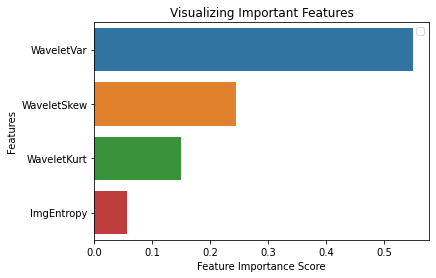

In [78]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

#Incarcare dataset
input_file = "data_banknote_authentication.txt"
data = pd.read_csv(input_file, header = 0)

array = data.values
X = array[:,0:4]
Y = array[:,4]
data

# Impartire dataset train+test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test

#Creare Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Antrenare model
clf.fit(X_train,Y_train)
#Predict
Y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print(list(data.columns)[0:4])


import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=list(data.columns)[0:4]).sort_values(ascending=False)
print(feature_imp)

import matplotlib.pyplot as plt
import seaborn as sns


sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [82]:
#GridSearch pentru imbunatatire rezultate-cautarea celor mai bune valori pentru parametri
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(5,15),'criterion':('gini', 'entropy') ,'max_depth':range(5,10)}
model2 = RandomForestClassifier()
clf_random = GridSearchCV(model2, parameters)
clf_random.fit(X, Y)
clf_random.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 9}

In [83]:
from sklearn.metrics import f1_score
#Schimbare parametrii pentru a imbunatati performanta
#Valorile pentru parametrii sunt cei gasiti de GridSearch

clf_random.fit(X_train,Y_train)
Y_prediction = clf_random.predict(X_test)
print("Y: ",Y)
print("Y_prediction:",Y_prediction)
print("Y_test:",Y_test)
print("Metricile dupa setarea parametrilor optimi:")
print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))

confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)

recall_show = recall_score(Y_test, Y_prediction) 
print("Recall_score is :",recall_show)

precision_show = precision_score(Y_test, Y_prediction) 
print("Precision Score is : ", precision_show)

f1_score = f1_score(Y_test, Y_prediction)
print("f1 Score is : ",f1_score)

Y:  [0. 0. 0. ... 1. 1. 1.]
Y_prediction: [1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0.

# ExtraTrees Classifier

In [91]:
#4. ExtraTrees Classification
ext = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(ext, X, Y, cv=5)
print(scores.mean())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
ext.fit(X_train,Y_train)

#2. Testare estimator pe 2 exemple concrete
my_tests = [[3.6216,8.6661,-2.8073,-0.44699],[-2.5419,-0.65804,2.6842,1.1952]]
Y_prediction_test= ext.predict(my_tests)
print("Prediction_test : ",Y_prediction_test)

from sklearn.metrics import f1_score
print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))
confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)
recall_show = recall_score(Y_test, Y_prediction) # calculates the fraction of positive samples predicted correctly
print("Recall_score is :",recall_show)
precision_show = precision_score(Y_test, Y_prediction) # calculates the fraction of predicted positives samples that are actually positive
print("Precision Score is : ", precision_show)
f1_score = f1_score(Y_test, Y_prediction)
print("f1 Score is : ",f1_score)

#Cross-validation-evaluare scor
from sklearn.model_selection import cross_val_score
print("Cross-validation score : ",cross_val_score(ext, X,Y,cv=5) )

0.9985401459854014
Prediction_test :  [0. 1.]
Accuracy: 0.9927007299270073
Confusion matrix is :  [[155   2]
 [  0 117]]
Recall_score is : 1.0
Precision Score is :  0.9831932773109243
f1 Score is :  0.9915254237288135
Cross-validation score :  [1.         1.         0.99635036 0.99635036 1.        ]


In [84]:
#GridSearch pentru imbunatatire rezultate-cautarea celor mai bune valori pentru parametri
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(5,15),'criterion':('gini', 'entropy') ,'max_depth':range(5,10)}
model2 = ExtraTreesClassifier()
clf_extra = GridSearchCV(model2, parameters)
clf_extra.fit(X, Y)
clf_extra.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 12}

In [85]:
from sklearn.metrics import f1_score
#Schimbare parametrii pentru a imbunatati performanta
#Valorile pentru parametrii sunt cei gasiti de GridSearch

clf_extra.fit(X_train,Y_train)
Y_prediction = clf_extra.predict(X_test)
print("Y: ",Y)
print("Y_prediction:",Y_prediction)
print("Y_test:",Y_test)
print("Metricile dupa setarea parametrilor optimi:")
print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))

confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)

recall_show = recall_score(Y_test, Y_prediction) 
print("Recall_score is :",recall_show)

precision_show = precision_score(Y_test, Y_prediction) 
print("Precision Score is : ", precision_show)

f1_score = f1_score(Y_test, Y_prediction)
print("f1 Score is : ",f1_score)

Y:  [0. 0. 0. ... 1. 1. 1.]
Y_prediction: [1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0.

# Vizualizare rezultate cu parametri diferiti

In [76]:
#Variatia numarului de estimatori in intervalul (1-200)
range_k = range(1,201,10)
scoresR = {}
scores_listR = []
scoresE = {}
scores_listE = []

for k in range_k:
    rmodel = RandomForestClassifier(n_estimators=k)
    ext = ExtraTreesClassifier(n_estimators=k)
    
    rmodel.fit(X_train, Y_train)
    ext.fit(X_train, Y_train)
    Y_predictionR = rmodel.predict(X_test)
    Y_predictionE = ext.predict(X_test)
    
    scoresR[k] = metrics.accuracy_score(Y_test,Y_predictionR)
    scores_listR.append(metrics.accuracy_score(Y_test,Y_predictionR))
    
    scoresE[k] = metrics.accuracy_score(Y_test,Y_predictionE)
    scores_listE.append(metrics.accuracy_score(Y_test,Y_predictionE))

Text(0, 0.5, 'Accuracy')

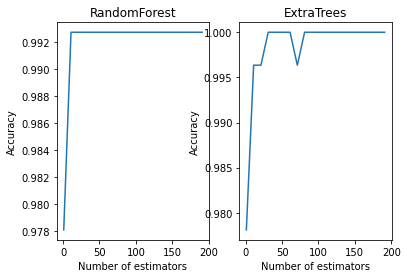

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(range_k,scores_listR)
plt.title("RandomForest")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range_k,scores_listE)
plt.title("ExtraTrees")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")